# Data Exploration and Cleaning

In [1]:
import pandas as pd
df = pd.read_csv('temperature.csv.zip')
df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,284.570000,NaN,272.480000,282.170000,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Convert to proper datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Now safely set as index
df = df.set_index('datetime') 

In [7]:
# Create a list of wanted locations to select
wanted_locations = ['New York', 'Los Angeles', 'Chicago', 'Charlotte']
df = df[wanted_locations]
df

,New York,Los Angeles,Chicago,Charlotte
datetime,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN
2012-10-01 13:00:00,288.220000,291.870000,284.010000,288.650000
2012-10-01 14:00:00,288.247676,291.868186,284.054691,288.650172
2012-10-01 15:00:00,288.326940,291.862844,284.177412,288.650582
2012-10-01 16:00:00,288.406203,291.857503,284.300133,288.650991
...,...,...,...,...
2017-11-29 20:00:00,NaN,293.550000,281.340000,294.150000
2017-11-29 21:00:00,NaN,295.680000,281.690000,293.900000
2017-11-29 22:00:00,NaN,295.960000,281.070000,292.060000


In [23]:
# check for duplicate timestamps  
num_of_duplicates = df.index.duplicated().sum()

# if duplicates are found print how many to console
if num_of_duplicates > 0:
    print(f"Found {num_of_duplicate_rows} duplicate rows")
# Else no duplicates found 
else:
    print('No duplicate timestamps found')

No duplicate timestamps found


In [25]:
df.isnull().sum()

New York       793
Los Angeles      3
Chicago          3
Charlotte        3
dtype: int64

In [27]:
for cols in df.columns:
    percentages = df[cols].isnull().mean()*100
    print(cols + ': ' + str(round(percentages,2)) + '%')

New York: 1.75%
Los Angeles: 0.01%
Chicago: 0.01%
Charlotte: 0.01%


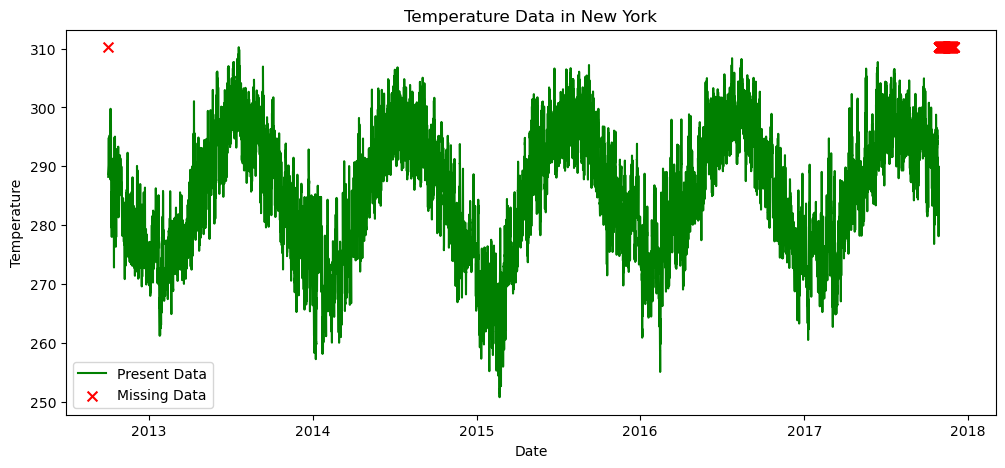

In [29]:
import matplotlib.pyplot as plt

# Check for missing values in the New York column
missing_data = df['New York'].isnull()

# Plot the temperature data for New York
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['New York'], color='green', label='Present Data')

# Highlight missing data points
plt.scatter(df.index[missing_data], 
            [df['New York'].max()] * missing_data.sum(), 
            color='red', marker='x', s=50, label='Missing Data')

# Labels and title
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Data in New York")
plt.legend()
plt.show()

In [31]:
df = df.dropna(subset=['New York'])

print(df.isnull().sum())

for cols in df.columns:
    percentages = df[cols].isnull().mean()*100
    print(cols + ': ' + str(round(percentages,2)) + '%')


New York       0
Los Angeles    2
Chicago        2
Charlotte      2
dtype: int64
New York: 0.0%
Los Angeles: 0.0%
Chicago: 0.0%
Charlotte: 0.0%


In [33]:
# Check to see if missing data was at the beginning of the dataset 
print(df.head(10))

                       New York  Los Angeles     Chicago   Charlotte
datetime                                                            
2012-10-01 13:00:00  288.220000   291.870000  284.010000  288.650000
2012-10-01 14:00:00  288.247676   291.868186  284.054691  288.650172
2012-10-01 15:00:00  288.326940   291.862844  284.177412  288.650582
2012-10-01 16:00:00  288.406203   291.857503  284.300133  288.650991
2012-10-01 17:00:00  288.485467   291.852162  284.422855  288.651401
2012-10-01 18:00:00  288.564730   291.846821  284.545576  288.651810
2012-10-01 19:00:00  288.643994   291.841480  284.668297  288.652220
2012-10-01 20:00:00  288.723257   291.836139  284.791018  288.652629
2012-10-01 21:00:00  288.802521   291.830798  284.913739  288.653039
2012-10-01 22:00:00  288.881784   291.825457  285.036461  288.653448


In [35]:
# Not at the begining of the data set so can use linear interpolation to fill in the gaps
df = df.interpolate(method='linear')
print(df.isnull().sum())

New York       0
Los Angeles    0
Chicago        0
Charlotte      0
dtype: int64


In [37]:
statistics_summary = df[['New York', 'Los Angeles', 'Chicago', 'Charlotte']].describe().T
statistics_summary.rename(columns={'50%': 'median'}, inplace=True)
print(f"                                 Statistical Summary: \n{statistics_summary}")

                                 Statistical Summary: 
               count        mean        std         min     25%      median  \
New York     44460.0  285.400406  10.220932  250.774000  277.37  285.870000   
Los Angeles  44460.0  290.841283   6.495573  266.503667  286.33  290.530000   
Chicago      44460.0  283.453800  11.052070  248.890000  275.20  284.249000   
Charlotte    44460.0  288.995063   9.146283  255.658333  282.15  290.257333   

                75%     max  
New York     293.76  310.24  
Los Angeles  295.13  315.47  
Chicago      292.41  308.48  
Charlotte    295.85  310.90  


# part 2

use a line plot it is the best for trends over time. 
discuss the patterns |
compare between the city 
try to limit to 500 words
probably better for me to create subplots as i find it easier to compare them 

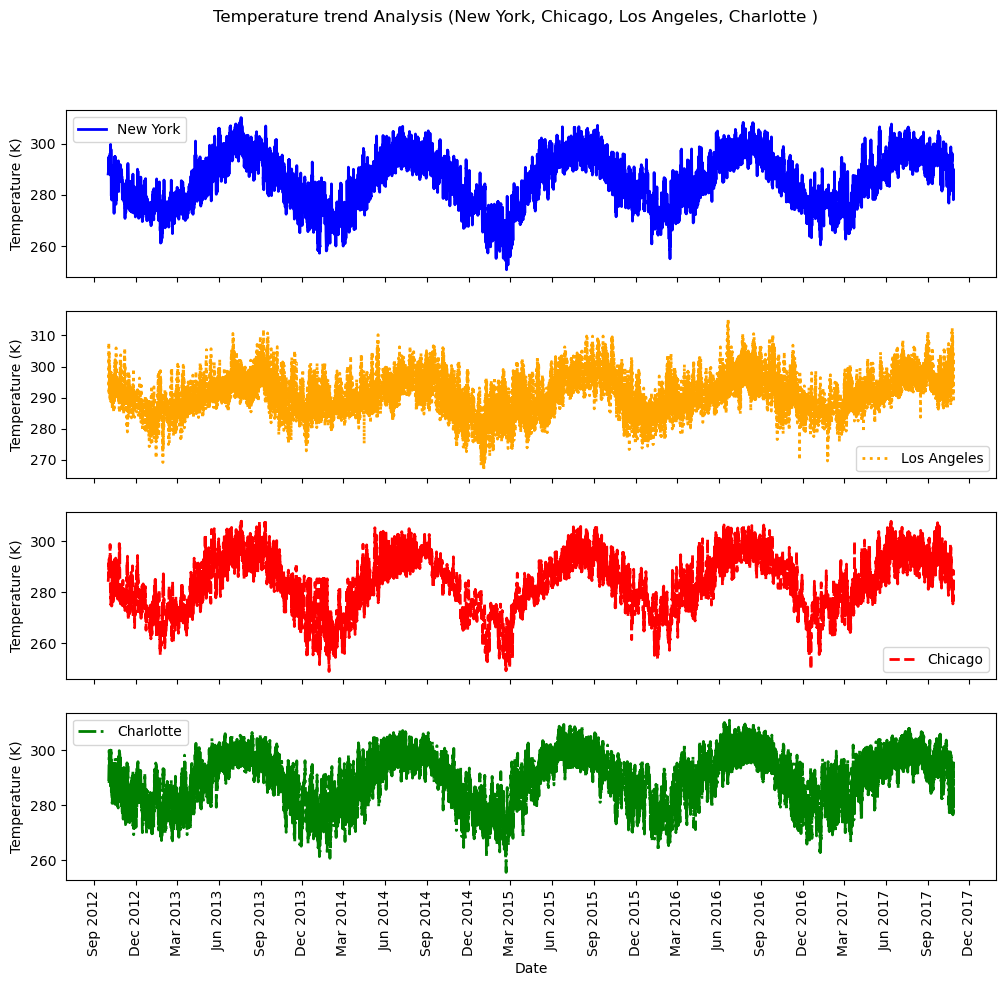

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig,axes = plt.subplots(4,1, figsize=(12,10), sharex=True)
cities = ['New York', 'Los Angeles', 'Chicago', 'Charlotte']
linestyle = ['-', ':', '--', '-.']
colours = ['blue', 'orange', 'red', 'green']

for i, city in enumerate(cities):
    axes[i].plot(df.index, df[city], linestyle=linestyle[i], linewidth=2, color=colours[i], label=city)
    axes[i].set_ylabel('Temperature (K)')
    axes[i].legend()

    axes[i].xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xlabel('Date')
plt.suptitle('Temperature trend Analysis (New York, Chicago, Los Angeles, Charlotte )')
plt.xticks(rotation=90)

plt.show()

# part 3
conduct correlation analalysis 
use seaborn the calculate the heat maps however check if it can be done with pandas 

In [51]:
# Print Correlation matrix 
weather_correlation = df.corr()
print(weather_correlation)

             New York  Los Angeles   Chicago  Charlotte
New York     1.000000     0.620361  0.867301   0.893439
Los Angeles  0.620361     1.000000  0.593799   0.617960
Chicago      0.867301     0.593799  1.000000   0.814720
Charlotte    0.893439     0.617960  0.814720   1.000000


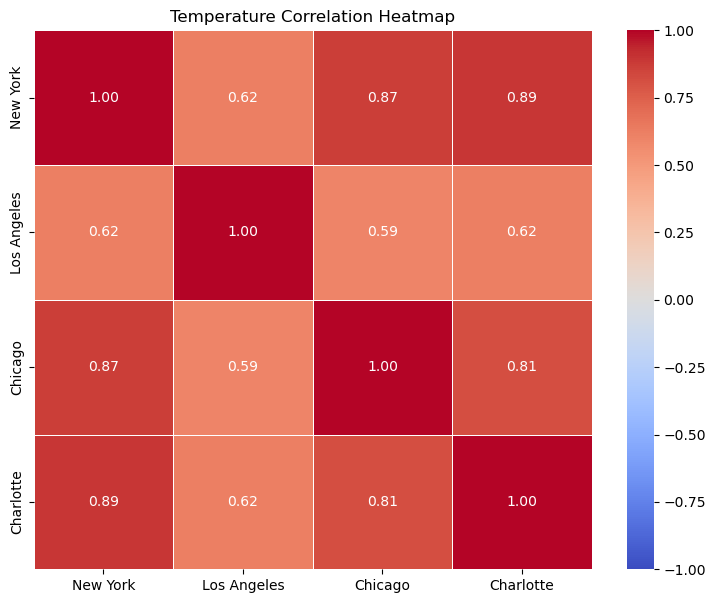

In [83]:
import seaborn as sns

plt.figure(figsize=(9,7))
plt.title("Temperature Correlation Heatmap")
sns.heatmap(weather_correlation, 
            cmap ='coolwarm', 
            center=0, 
            vmin=-1, 
            vmax=1, 
            annot=True, 
            fmt='.2f',
            linewidth=0.5
            )
plt.show()

## Part 4

create a box and whisker plot showing he min and max value link it to my staticial summary to go along with it whihc also shows the interqrtile ranges and 

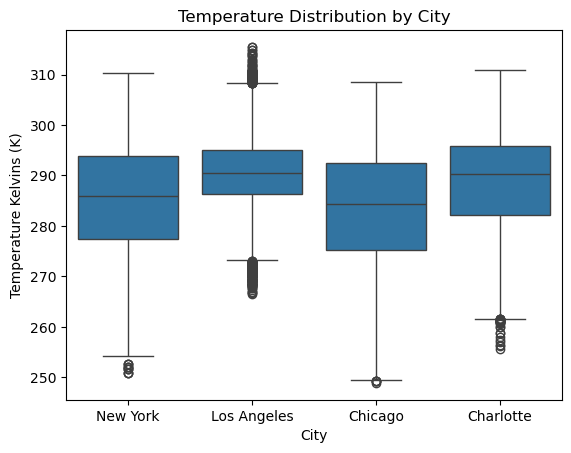

In [107]:
# Reshape the data frame to 2 columns
df_boxplot = pd.melt(df, var_name="City", value_name="Temperature")

# Create a boxplot using Seaborn
sns.boxplot(x="City", y="Temperature", data=df_boxplot)
plt.title("Temperature Distribution by City")
plt.xlabel("City")
plt.ylabel("Temperature Kelvins (K)")
plt.show()

## Part 5

In [123]:
import pandas as pd 
from scipy import stats

df_ttest = df[['New York', 'Charlotte']]

t, p = stats.ttest_ind(df_ttest['New York'], df_ttest['Charlotte'])

# check df1 could be changed back to degrees of freedom to paired
df1 = len(df_ttest['New York']) + len(df_ttest['Charlotte']) - 2

print(f't({df1}) = {t:.2f}, p = {p:.3f}')

t(88918) = -55.26, p = 0.000
